In [3]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:

print(os.path.exists("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_Susztak_KPMP_SC_SN_ATAC_merged_PostSCVI_final.h5ad"))
#print(os.path.exists("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_Susztak_SC_SN_ATAC_merged_PostSCVI_final.h5ad"))
# --- 1. Read processed data ---
adata = sc.read_h5ad("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_Susztak_KPMP_SC_SN_ATAC_merged_PostSCVI_final.h5ad")
#adata = sc.read_h5ad("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/GSE211785_Susztak_SC_SN_ATAC_merged_PostSCVI_final.h5ad")


True


In [11]:
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")


Number of cells: 588177
Number of genes: 3000


In [12]:
adata



AnnData object with n_obs × n_vars = 588177 × 3000
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'tech', 'proj', 'dataSource', 'library_id', 'specimen_id', 'region', 'percent.cortex', 'percent.medulla', 'cluster_id', 'UMAP_1', 'UMAP_2', 'sampletype', 'umap1', 'umap2', 'SpecimenID', 'diseasetype', 'age', 'gender', 'state', 'tissuetype', 'celltype', 'Cluster_Idents_New2', 'StudyName'
    var: 'vst.mean-0', 'vst.variance-0', 'vst.variance.expected-0', 'vst.variance.standardized-0', 'vst.variable-0', 'vst.mean-1', 'vst.variance-1', 'vst.variance.expected-1', 'vst.variance.standardized-1', 'vst.variable-1', 'name-2', 'vst.mean-3', 'vst.variance-3', 'vst.variance.expected-3', 'vst.variance.standardized-3', 'vst.variable-3', 'vst.mean-4', 'vst.variance-4', 'vst.variance.expected-4', 'vst.variance.standardized-4', 'vst.variable-4', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Cluster_Ide

In [13]:
import pandas as pd

# --- 1. Define columns of interest ---
cols_of_interest = [
    'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'tech', 'proj',
    'dataSource', 'library_id', 'specimen_id', 'region', 'percent.cortex',
    'percent.medulla', 'cluster_id', 'UMAP_1', 'UMAP_2', 'sampletype', 'umap1',
    'umap2', 'SpecimenID', 'diseasetype', 'age', 'gender', 'state',
    'tissuetype', 'celltype', 'Cluster_Idents_New2', 'StudyName'
]

# --- 2. Check which columns exist in your AnnData object ---
available_cols = [c for c in cols_of_interest if c in adata.obs.columns]
missing_cols = [c for c in cols_of_interest if c not in adata.obs.columns]

print(f"✅ Found {len(available_cols)} / {len(cols_of_interest)} columns in adata.obs")
if missing_cols:
    print(f"⚠️ Missing columns: {missing_cols}")

# --- 3. Display first few rows (head) ---
display(adata.obs[available_cols].head())


✅ Found 27 / 27 columns in adata.obs


,orig_ident,nCount_RNA,nFeature_RNA,percent_mt,tech,proj,dataSource,library_id,specimen_id,region,...,umap2,SpecimenID,diseasetype,age,gender,state,tissuetype,celltype,Cluster_Idents_New2,StudyName
HK2893.SN_AAACCCAAGAACTTCC-1_9_1,HK2893.SN,1160.504472,969,0.000000,SN_RNA,HK_SN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PT_S3,1
HK2862.SN_AAACCCAAGAAGCGCT-1_15_1,HK2862.SN,1279.697719,982,0.001191,SN_RNA,HK_SN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Macula_Densa,1
HK2898.SN_AAACCCAAGACGATAT-1_11_1,HK2898.SN,1725.392859,1444,0.000000,SN_RNA,HK_SN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PT_S1,1
HK2862.SN_AAACCCAAGACTTGTC-1_15_1,HK2862.SN,1146.869160,901,0.000000,SN_RNA,HK_SN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Macula_Densa,1
HK2596.SN_AAACCCAAGATACCAA-1_16_1,HK2596.SN,1578.851075,1460,0.000000,SN_RNA,HK_SN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MyoFib,1


In [14]:
genes = [
    "ALDOB","ALDH8A1","NAT8B","SLC5A10","PAX8","CUBN","SLC17A3","ACSF2","ARMC7",
    "BDH2","BICC1","CRB2","CYFIP2","EFHD1","HOXA9","KCNJ15","LGALS2","OCIAD2",
    "PEPD","RGL3","SHMT1","SLC2A9","SLC9A3","TM7SF3"
]

for g in genes:
    matches = [gene for gene in adata.raw.var_names if g.lower() in gene.lower()]
    print(f"{g} matches: {matches}")


ALDOB matches: ['ALDOB']
ALDH8A1 matches: ['ALDH8A1']
NAT8B matches: []
SLC5A10 matches: ['SLC5A10']
PAX8 matches: ['PAX8']
CUBN matches: ['CUBN']
SLC17A3 matches: ['SLC17A3']
ACSF2 matches: ['ACSF2']
ARMC7 matches: ['ARMC7']
BDH2 matches: ['BDH2']
BICC1 matches: ['BICC1']
CRB2 matches: ['CRB2']
CYFIP2 matches: ['CYFIP2']
EFHD1 matches: ['EFHD1']
HOXA9 matches: ['HOXA9']
KCNJ15 matches: ['KCNJ15']
LGALS2 matches: ['LGALS2']
OCIAD2 matches: ['OCIAD2']
PEPD matches: ['PEPD']
RGL3 matches: ['RGL3']
SHMT1 matches: ['SHMT1']
SLC2A9 matches: ['SLC2A9']
SLC9A3 matches: ['SLC9A3', 'SLC9A3R2', 'SLC9A3R1']
TM7SF3 matches: ['TM7SF3']


In [15]:

# Check columns exist
if "celltype" not in adata.obs.columns:
    raise KeyError("❌ 'celltype' column not found in adata.obs.")
if "tech" not in adata.obs.columns:
    raise KeyError("❌ 'tech' column not found in adata.obs.")

# Count total cells
total_cells = adata.n_obs

# Count non-missing values per column
non_na_celltype = adata.obs["celltype"].notna().sum()
non_na_datasource = adata.obs["tech"].notna().sum()

# Count cells that have both non-missing
non_na_both = adata.obs[adata.obs["celltype"].notna() & adata.obs["tech"].notna()].shape[0]

# Print results
print(f"🧫 Total cells in dataset: {total_cells:,}")
print(f"✅ Cells with celltype annotation: {non_na_celltype:,}")
print(f"✅ Cells with tech annotation: {non_na_datasource:,}")
print(f"✅ Cells with both annotations present: {non_na_both:,}")
print(f"⚠️ Missing celltype: {total_cells - non_na_celltype:,}")
print(f"⚠️ Missing tech: {total_cells - non_na_datasource:,}")


🧫 Total cells in dataset: 588,177
✅ Cells with celltype annotation: 104,574
✅ Cells with tech annotation: 588,177
✅ Cells with both annotations present: 104,574
⚠️ Missing celltype: 483,603
⚠️ Missing tech: 0


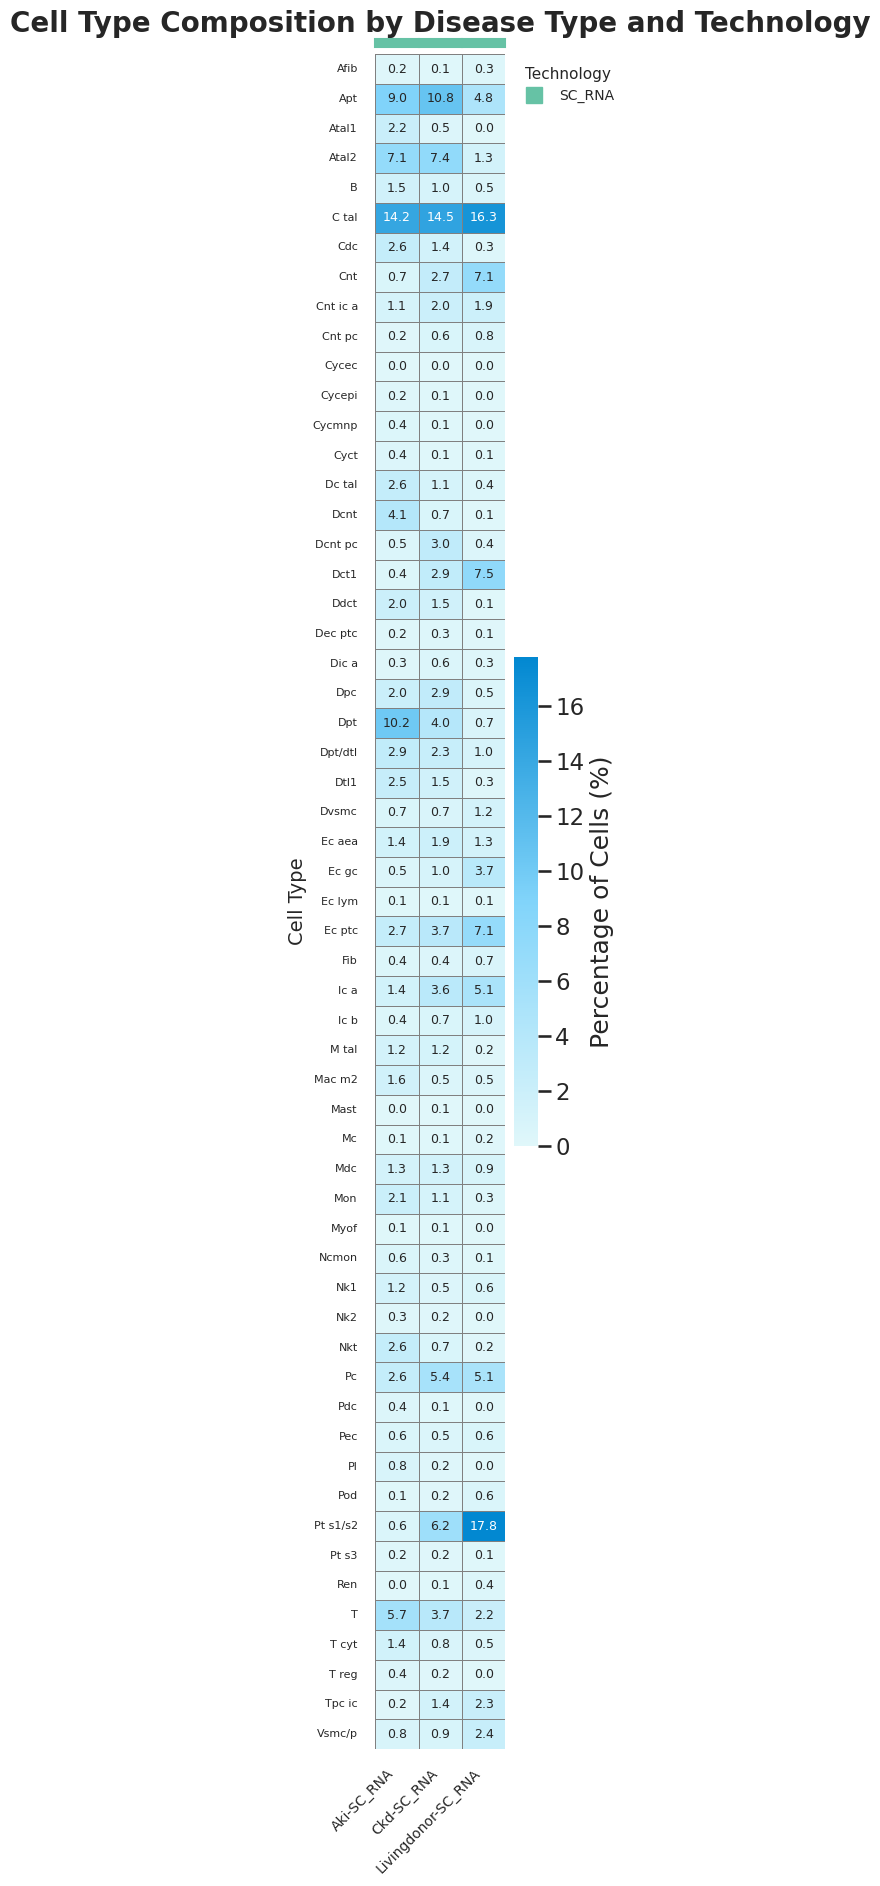

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

# --- 1. Extract and clean relevant metadata ---
df = adata.obs[['celltype', 'diseasetype', 'tech']].copy()
df = df.dropna(subset=['celltype', 'diseasetype', 'tech'])

# Clean text fields
df['celltype'] = df['celltype'].astype(str).str.strip()
df['diseasetype'] = df['diseasetype'].astype(str).str.strip().str.capitalize()
df['tech'] = df['tech'].astype(str).str.strip().str.replace(' ', '')

# Optional cleanup
df['celltype'] = df['celltype'].str.replace('_', ' ').str.replace('-', ' ').str.capitalize()

# --- 2. Count cells per (celltype, diseasetype, tech) ---
cell_counts = (
    df.groupby(['celltype', 'diseasetype', 'tech'])
    .size()
    .reset_index(name='count')
)

# --- 3. Compute fraction and percentage ---
cell_counts['fraction'] = cell_counts.groupby(['diseasetype', 'tech'])['count'].transform(lambda x: x / x.sum())
cell_counts['percentage'] = cell_counts['fraction'] * 100

# --- 4. Pivot for heatmap ---
heatmap_data = (
    cell_counts
    .pivot_table(index='celltype', columns=['diseasetype', 'tech'], values='percentage', fill_value=0)
).sort_index(axis=0).sort_index(axis=1, level=[0, 1])

# --- 5. Sky-blue Nature-style color map ---
skyblue_cmap = LinearSegmentedColormap.from_list(
    "skyblue_cmap",
    ["#e0f7fa", "#81d4fa", "#0288d1"]   # light to deep blue
)

# --- 6. Define color palette for tech strip ---
tech_levels = heatmap_data.columns.get_level_values(1).unique()
tech_palette = dict(zip(tech_levels, sns.color_palette("Set2", len(tech_levels))))

# --- 7. Figure size (tall + narrow for clarity) ---
n_rows = heatmap_data.shape[0]
fig_w = 4
fig_h = 20

sns.set_theme(style="white", context="talk")
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

# --- 8. Plot heatmap ---
ax = sns.heatmap(
    heatmap_data,
    cmap=skyblue_cmap,
    linewidths=0.4,
    linecolor="gray",
    cbar_kws={"label": "Percentage of Cells (%)", "shrink": 0.6},
    annot=True,
    fmt=".1f",
    annot_kws={"fontsize": 9}
)

# --- 9. Titles & labels ---
ax.set_title("Cell Type Composition by Disease Type and Technology", fontsize=20, fontweight="bold", pad=16)
ax.set_xlabel("") 
ax.set_ylabel("Cell Type", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)

# --- 10. Add colored tech strip ---
ncols = len(heatmap_data.columns)
x_positions = np.arange(ncols) + 0.5
y_position = -0.5
for x, tech in zip(x_positions, heatmap_data.columns.get_level_values(1)):
    ax.add_patch(Rectangle((x - 0.5, y_position), 1, 0.25, color=tech_palette[tech], transform=ax.transData, clip_on=False))

# --- 11. Legend for technologies ---
handles = [plt.Line2D([0], [0], marker='s', linestyle='', label=t, markersize=12,
                      markerfacecolor=c, markeredgecolor=c) for t, c in tech_palette.items()]
ax.legend(handles=handles, title="Technology", bbox_to_anchor=(1.02, 1), loc='upper left',
          frameon=False, fontsize=10, title_fontsize=11)

# --- 12. Layout & save ---
plt.tight_layout(rect=[0, 0.02, 0.95, 0.98])
plt.savefig("cell_fraction_heatmap_skyblue.png", dpi=400, bbox_inches='tight')
plt.show()


In [17]:
import pandas as pd

genes = ["CHMP1A", "DPEP1"]
cell_type_col = "celltype"

all_results = []

for gene in genes:
    # Get expression from raw
    expr = adata.raw[:, gene].X
    if hasattr(expr, "toarray"):  # sparse matrix
        expr = expr.toarray().flatten()
    else:
        expr = expr.flatten()
    
    # Create dataframe with cell types
    df = adata.obs[[cell_type_col]].copy()
    df[gene] = expr
    
    # Calculate fraction (%) of cells expressing gene per cell type
    fraction_expr = df.groupby(cell_type_col)[gene].apply(lambda x: (x>0).sum()/len(x) * 100)
    
    # Convert to DataFrame
    result_df = fraction_expr.reset_index()
    result_df.columns = [cell_type_col, "percentage_expressing"]
    result_df["gene"] = gene
    
    # Sort by percentage descending
    result_df = result_df.sort_values(by="percentage_expressing", ascending=False)
    
    all_results.append(result_df)

# Combine results for all genes
final_table = pd.concat(all_results, ignore_index=True)
final_table = final_table[["gene", cell_type_col, "percentage_expressing"]]

# Display
final_table



/tmp/ipykernel_1520616/2600109686.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraction_expr = df.groupby(cell_type_col)[gene].apply(lambda x: (x>0).sum()/len(x) * 100)
/tmp/ipykernel_1520616/2600109686.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraction_expr = df.groupby(cell_type_col)[gene].apply(lambda x: (x>0).sum()/len(x) * 100)


,gene,celltype,percentage_expressing
0,CHMP1A,cycEPI,30.434783
1,CHMP1A,CNT-IC-A,26.616628
2,CHMP1A,dCNT,23.509561
3,CHMP1A,CNT-PC,23.247232
4,CHMP1A,tPC-IC,22.285714
...,...,...,...
109,DPEP1,EC-LYM,0.000000
110,DPEP1,cycMNP,0.000000
111,DPEP1,pDC,0.000000
112,DPEP1,NK2,0.000000


✅ Found 23 genes in adata.raw
⚠️ Missing genes: {'NAT8B'}
✅ Using all 104,574 cells with valid celltype annotation
Z-score range after clipping: -0.79 to 10.00


/mnt/home3/miska/nm667/miniconda3/envs/cosmaxSpatial/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_1520616/556371603.py:132: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0.1, 0.1, 0.98, 0.95])


✅ Saved as: zscore_heatmap_clustered_final.[png/pdf]


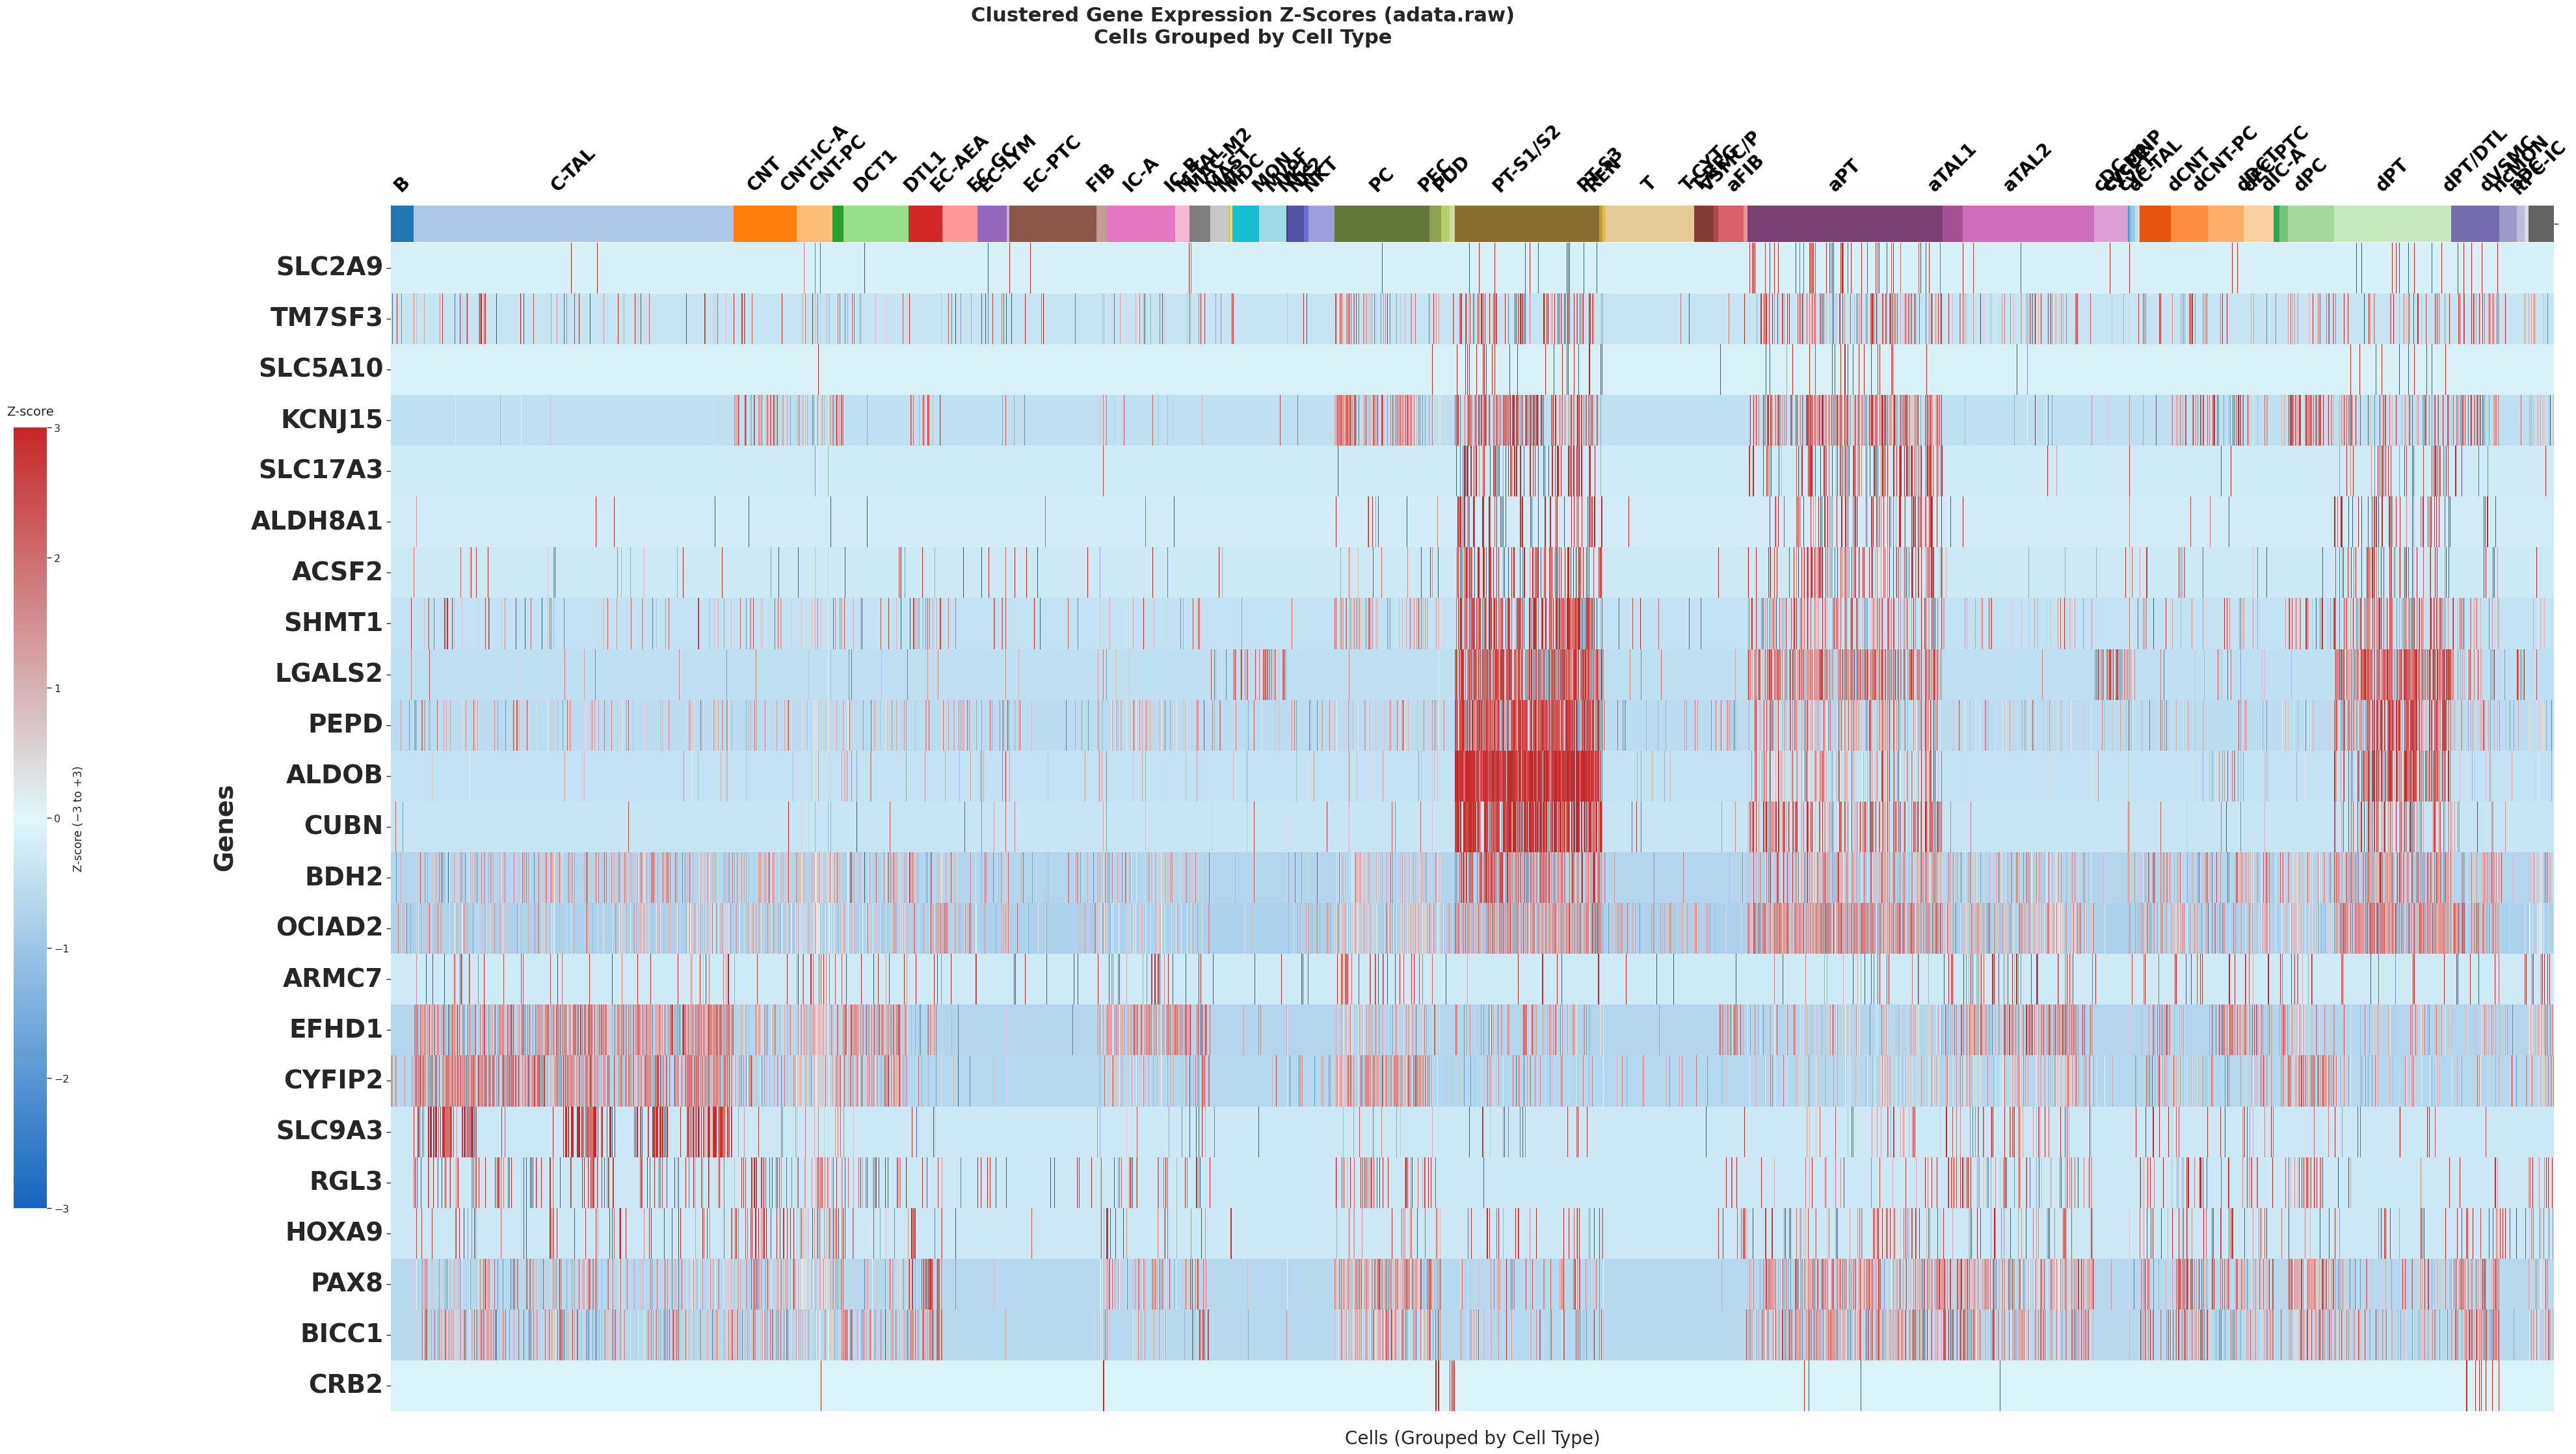

In [21]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# --- 1. Define genes of interest ---
genes = [
    "ALDOB","ALDH8A1","NAT8B","SLC5A10","PAX8","CUBN","SLC17A3","ACSF2","ARMC7",
    "BDH2","BICC1","CRB2","CYFIP2","EFHD1","HOXA9","KCNJ15","LGALS2","OCIAD2",
    "PEPD","RGL3","SHMT1","SLC2A9","SLC9A3","TM7SF3"
]

# --- 2. Ensure raw layer exists ---
if adata.raw is None:
    raise ValueError("❌ adata.raw is None — raw layer missing in AnnData.")

# --- 3. Filter available genes ---
genes_available = [g for g in genes if g in adata.raw.var_names]
missing = set(genes) - set(genes_available)
print(f"✅ Found {len(genes_available)} genes in adata.raw")
if missing:
    print(f"⚠️ Missing genes: {missing}")

# --- 4. Keep only annotated cells ---
adata_filtered = adata[~adata.obs["celltype"].isna()].copy()
print(f"✅ Using all {adata_filtered.n_obs:,} cells with valid celltype annotation")

# --- 5. Extract raw expression ---
X = adata_filtered.raw[:, genes_available].to_adata().to_df()
X["celltype"] = adata_filtered.obs["celltype"].astype(str).values
X = X.sort_values("celltype")

# --- 6. Prepare matrix (genes × cells) ---
expr_mat = X[genes_available].T
celltypes = X["celltype"].values

# --- 7. Compute Z-scores (per gene across all cells) ---
zscore_mat = expr_mat.apply(lambda x: (x - x.mean()) / x.std(ddof=0), axis=1)
zscore_mat = zscore_mat.fillna(0)

# --- 8. Clip to [-3, 3] for visualization ---
zscore_clip = zscore_mat.clip(lower=-10, upper=10)
print(f"Z-score range after clipping: {zscore_clip.values.min():.2f} to {zscore_clip.values.max():.2f}")

# --- 9. Build color palette for cell types ---
unique_cts = np.unique(celltypes)
palette = (
    sns.color_palette("tab20", 20)
    + sns.color_palette("tab20b", 20)
    + sns.color_palette("tab20c", 20)
)
palette = palette[:len(unique_cts)]
celltype_colors = dict(zip(unique_cts, palette))
col_colors = pd.Series(celltypes, index=zscore_clip.columns).map(celltype_colors)

# --- 10. Diverging color map centered at 0 ---
z_cmap = LinearSegmentedColormap.from_list(
    "z_cmap", ["#1565c0", "#e0f7fa", "#c62828"]
)

# --- 11. Clustered heatmap (rows only) ---
sns.set_theme(context="paper", style="white", font="DejaVu Sans", font_scale=1.3)
g = sns.clustermap(
    zscore_clip,
    cmap=z_cmap,
    col_colors=col_colors,
    figsize=(42, 24),
    xticklabels=False,
    yticklabels=True,
    col_cluster=False,
    row_cluster=True,
    center=0,
    vmin=-3, vmax=3,
    cbar_kws={"label": "Z-score (−3 to +3)", "shrink": 0.5, "aspect": 10},
    dendrogram_ratio=(0.01, 0.01),
)

# --- 12. Hide dendrograms ---
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# --- 13. Adjust colorbar (left side with spacing) ---
cbar = g.cax
g.fig.subplots_adjust(left=0.18, right=0.98, top=0.9, bottom=0.12)
cbar.set_position([0.05, 0.25, 0.012, 0.5])
cbar.set_title("Z-score", fontsize=14, pad=14)

# --- 14. Title and axis formatting ---
plt.suptitle(
    "Clustered Gene Expression Z-Scores (adata.raw)\nCells Grouped by Cell Type",
    y=1.02, fontsize=22, fontweight="bold"
)

# Double the size of gene labels
g.ax_heatmap.yaxis.tick_left()
g.ax_heatmap.yaxis.set_label_position("left")
for label in g.ax_heatmap.get_yticklabels():
    label.set_fontsize(28)   # ⬆️ doubled font size
    label.set_fontweight("bold")

g.ax_heatmap.set_xlabel("Cells (Grouped by Cell Type)", fontsize=20, labelpad=20)
g.ax_heatmap.set_ylabel("Genes", fontsize=28, fontweight="bold", labelpad=14)

# --- 15. Compute boundaries and centers for cell-type labels ---
boundaries, prev = [], None
for i, ct in enumerate(celltypes):
    if ct != prev:
        boundaries.append(i)
        prev = ct
boundaries.append(len(celltypes))
centers = [(boundaries[i] + boundaries[i+1]) / 2 for i in range(len(boundaries) - 1)]

# --- 16. Centered cell-type names (with spacing) ---
for i, ct in enumerate(unique_cts):
    g.ax_col_colors.text(
        centers[i],
        -0.3,           # ⬆️ raised higher to prevent overlap
        ct,
        ha="center",
        va="bottom",
        rotation=45,
        fontsize=20,
        fontweight="bold",
        color="black",
        transform=g.ax_col_colors.transData,
        clip_on=False,
    )

# --- 17. Final layout adjustments ---
plt.tight_layout(rect=[0.1, 0.1, 0.98, 0.95])

# --- 18. Save high-quality outputs ---
g.savefig("zscore_heatmap_clustered_final.png", dpi=600, bbox_inches="tight", pad_inches=0.05)
g.savefig("zscore_heatmap_clustered_final.pdf", dpi=600, bbox_inches="tight", pad_inches=0.05)
print("✅ Saved as: zscore_heatmap_clustered_final.[png/pdf]")

plt.show()


✅ Found 23 genes in adata.raw
⚠️ Missing genes: {'NAT8B'}
✅ Using all 104,574 cells with valid celltype annotation


/mnt/home3/miska/nm667/miniconda3/envs/cosmaxSpatial/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


/tmp/ipykernel_1520616/2716968110.py:120: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0.1, 0.1, 0.98, 0.95])


✅ Saved as: raw_expression_heatmap_clustered_final.[png/pdf]


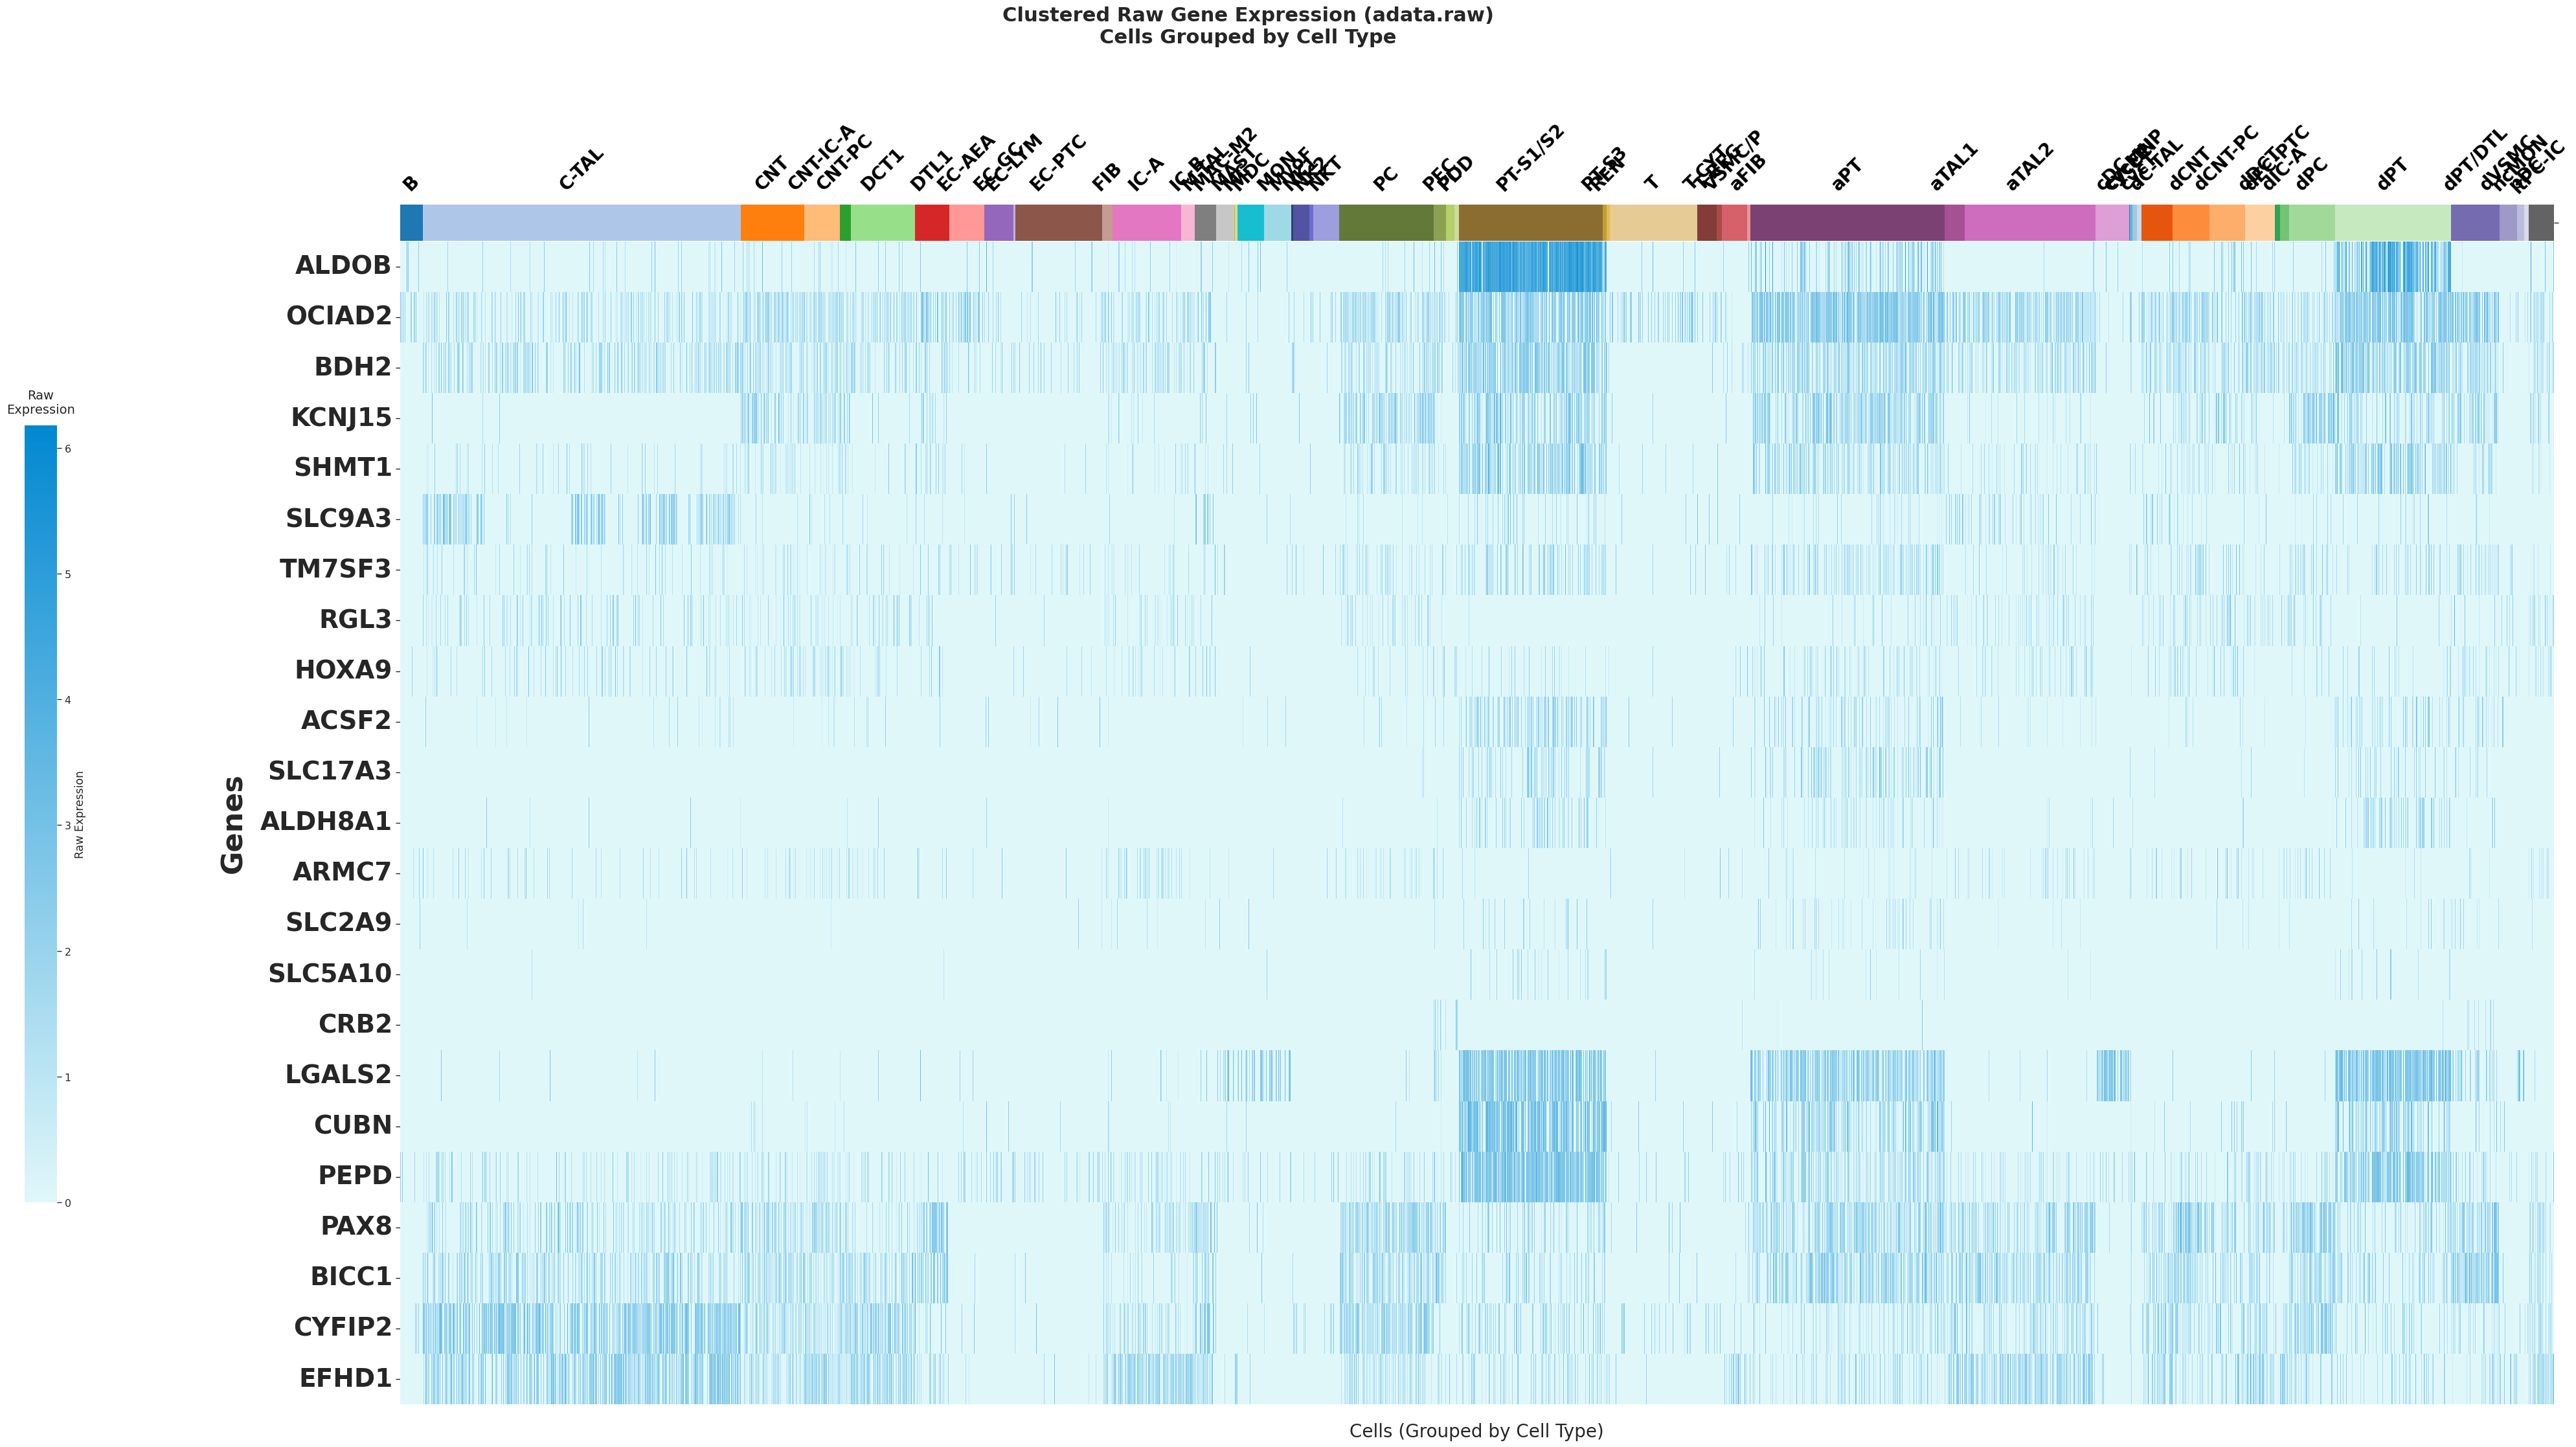

In [22]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# --- 1. Define genes of interest ---
genes = [
    "ALDOB","ALDH8A1","NAT8B","SLC5A10","PAX8","CUBN","SLC17A3","ACSF2","ARMC7",
    "BDH2","BICC1","CRB2","CYFIP2","EFHD1","HOXA9","KCNJ15","LGALS2","OCIAD2",
    "PEPD","RGL3","SHMT1","SLC2A9","SLC9A3","TM7SF3"
]

# --- 2. Ensure raw layer exists ---
if adata.raw is None:
    raise ValueError("❌ adata.raw is None — raw layer missing in AnnData.")

# --- 3. Filter available genes ---
genes_available = [g for g in genes if g in adata.raw.var_names]
missing = set(genes) - set(genes_available)
print(f"✅ Found {len(genes_available)} genes in adata.raw")
if missing:
    print(f"⚠️ Missing genes: {missing}")

# --- 4. Keep only annotated cells ---
adata_filtered = adata[~adata.obs["celltype"].isna()].copy()
print(f"✅ Using all {adata_filtered.n_obs:,} cells with valid celltype annotation")

# --- 5. Extract raw expression ---
X = adata_filtered.raw[:, genes_available].to_adata().to_df()
X["celltype"] = adata_filtered.obs["celltype"].astype(str).values
X = X.sort_values("celltype")

# --- 6. Prepare expression matrix ---
expr_mat = X[genes_available].T
celltypes = X["celltype"].values

# --- 7. Build distinct color palette ---
unique_cts = np.unique(celltypes)
palette = (
    sns.color_palette("tab20", 20)
    + sns.color_palette("tab20b", 20)
    + sns.color_palette("tab20c", 20)
)
palette = palette[:len(unique_cts)]
celltype_colors = dict(zip(unique_cts, palette))
col_colors = pd.Series(celltypes, index=expr_mat.columns).map(celltype_colors)

# --- 8. Sky-blue color scale ---
skyblue_cmap = LinearSegmentedColormap.from_list("skyblue_cmap", ["#e0f7fa", "#0288d1"])

# --- 9. Clustered heatmap ---
sns.set_theme(context="paper", style="white", font="DejaVu Sans", font_scale=1.3)
g = sns.clustermap(
    expr_mat,
    cmap=skyblue_cmap,
    col_colors=col_colors,
    figsize=(42, 24),
    xticklabels=False,
    yticklabels=True,
    col_cluster=False,
    row_cluster=True,
    cbar_kws={"label": "Raw Expression", "shrink": 0.5, "aspect": 10},
    dendrogram_ratio=(0.01, 0.01),
)

# --- 10. Hide dendrograms ---
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# --- 11. Adjust colorbar (left side with margin) ---
cbar = g.cax
g.fig.subplots_adjust(left=0.18, right=0.98, top=0.9, bottom=0.12)
cbar.set_position([0.05, 0.25, 0.012, 0.5])
cbar.set_title("Raw\nExpression", fontsize=14, pad=14)

# --- 12. Title and labels ---
plt.suptitle(
    "Clustered Raw Gene Expression (adata.raw)\nCells Grouped by Cell Type",
    y=1.02, fontsize=22, fontweight="bold"
)

# Bold, large gene labels
g.ax_heatmap.yaxis.tick_left()
g.ax_heatmap.yaxis.set_label_position("left")
for label in g.ax_heatmap.get_yticklabels():
    label.set_fontsize(28)  # ⬆️ doubled size
    label.set_fontweight("bold")

g.ax_heatmap.set_xlabel("Cells (Grouped by Cell Type)", fontsize=20, labelpad=20)
g.ax_heatmap.set_ylabel("Genes", fontsize=32, fontweight="bold", labelpad=14)

# --- 13. Compute cell-type boundaries and centers ---
boundaries, prev = [], None
for i, ct in enumerate(celltypes):
    if ct != prev:
        boundaries.append(i)
        prev = ct
boundaries.append(len(celltypes))
centers = [(boundaries[i] + boundaries[i+1]) / 2 for i in range(len(boundaries) - 1)]

# --- 14. Centered, readable cell-type labels ---
for i, ct in enumerate(unique_cts):
    g.ax_col_colors.text(
        centers[i],
        -0.3,            # higher to avoid overlap
        ct,
        ha="center",
        va="bottom",
        rotation=45,
        fontsize=20,
        fontweight="bold",
        color="black",
        transform=g.ax_col_colors.transData,
        clip_on=False,
    )

# --- 15. Final layout tweaks ---
plt.tight_layout(rect=[0.1, 0.1, 0.98, 0.95])

# --- 16. Save outputs (PNG + PDF) ---
g.savefig("raw_expression_heatmap_clustered_final.png", dpi=600, bbox_inches="tight", pad_inches=0.05)
g.savefig("raw_expression_heatmap_clustered_final.pdf", dpi=600, bbox_inches="tight", pad_inches=0.05)

print("✅ Saved as: raw_expression_heatmap_clustered_final.[png/pdf]")

plt.show()


In [23]:
# List unique tech values
adata.obs["tech"].unique().tolist()


['SN_RNA', 'SC_RNA', 'SN_ATAC']

In [24]:
# List unique 'diseasetype' values
adata.obs['diseasetype'].unique().tolist()

[nan, 'AKI', 'CKD', 'LivingDonor']

In [25]:


# --- 1. Check that 'celltype' column exists ---
if "celltype" not in adata.obs.columns:
    raise KeyError("❌ 'celltype' column not found in adata.obs")

# --- 2. Count number of cells per cell type ---
celltype_counts = adata.obs["celltype"].value_counts().sort_index()

# --- 3. Convert to DataFrame for easy viewing/export ---
celltype_df = celltype_counts.reset_index()
celltype_df.columns = ["celltype", "n_cells"]

# --- 4. Print summary ---
print(f"🧫 Total cells: {adata.n_obs:,}")
print(f"🧩 Unique cell types: {celltype_df.shape[0]}")
display(celltype_df.head(20))  # show first 20 types


🧫 Total cells: 588,177
🧩 Unique cell types: 57


,celltype,n_cells
0,dVSMC,842
1,aPT,9422
2,dC-TAL,1511
3,dCNT-PC,1736
4,dEC-PTC,260
5,dPC,2242
6,dIC-A,422
7,dCNT,1778
8,dDCT,1454
9,dPT,5636
